# Retail Analytics

In [1]:
#loading required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#loading transactional and customer data

transaction_data = pd.read_excel(r"C:\Users\DELL\Downloads\QVI_transaction_data.xlsx")
customer_data = pd.read_csv(r"C:\Users\DELL\Downloads\QVI_purchase_behaviour.csv")

## Exploratory Data Analysis

The first step in any analysis is to first understand the data. Let’s take a look at each of the datasets

### Examining Transaction data


In [3]:
#checking the first 10 rows in transaction data

transaction_data.head(10)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [4]:
#checking the summary of the columns 

transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


Date type is integer, and this needs to be converted to date

In [5]:
#converting date column to date

transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'],  unit= 'D', origin = '1899-12-30')
transaction_data['DATE']

0        2018-10-17
1        2019-05-14
2        2019-05-20
3        2018-08-17
4        2018-08-18
            ...    
264831   2019-03-09
264832   2018-08-13
264833   2018-11-06
264834   2018-12-27
264835   2018-09-22
Name: DATE, Length: 264836, dtype: datetime64[ns]

In [6]:
#checking the summary statistics

transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


Product quantity appears to have an outlier which we should investigate further. Let’s investigate further the case where 200 packets of chips were bought in one transaction.

In [7]:
#inspecting outliers

transaction_data[transaction_data['PROD_QTY']==200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There are two transactions where 200 packets of chips are bought and both of these transactions were by the same customer. Now, we will inspect if this customer has other transactions

In [8]:
#checking the customer with the outlier
transaction_data[transaction_data['LYLTY_CARD_NBR']==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


It looks like this customer has only had the two transactions over the year. The customer might be buying chips for commercial purposes instead of retail, so we'll remove this loyalty card number from further analysis.

In [9]:
transaction_data = transaction_data.drop([69762, 69763])

In [10]:
#confirming if the outliers has been dropped
transaction_data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264834.000000,2.648340e+05,2.648340e+05,264834.000000,264834.000000,264834.000000
mean,135.079423,1.355488e+05,1.351576e+05,56.583554,1.905813,7.299346
std,76.784063,8.057990e+04,7.813292e+04,32.826444,0.343436,2.527241
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760050e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351365e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.026998e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [11]:
#checking for nulls

transaction_data.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [12]:
#checking for duplicates

duplicates = transaction_data.duplicated(keep = False)
transaction_data[duplicates]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [13]:
#removing duplicates

transaction_data.drop_duplicates(inplace=True)

#confirming if duplicates have been dropped

duplicates = transaction_data.duplicated()
transaction_data[duplicates]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [14]:
#inspecting the date column

transaction_data['DATE'].max()

Timestamp('2019-06-30 00:00:00')

In [15]:
transaction_data['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [16]:
transaction_data['DATE'].nunique()

364

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's check the missing date

In [17]:
#checking all transaction dates

transaction_dates = transaction_data.groupby('DATE')['PROD_QTY'].sum().reset_index()
transaction_dates

,DATE,PROD_QTY
0,2018-07-01,1394
1,2018-07-02,1367
2,2018-07-03,1389
3,2018-07-04,1373
4,2018-07-05,1358
...,...,...
359,2019-06-26,1380
360,2019-06-27,1352
361,2019-06-28,1400
362,2019-06-29,1438


In [18]:
#creating a column of dates that includes every day from 1 Jul 2018 to 30 Jun 2019

start_date = '2018-07-01'
end_date   = '2019-06-30'

New_Dates = pd.date_range(start_date, end_date).tolist()
New_Dates = pd.Series(New_Dates, name='ALL_DATE')
New_Dates

0     2018-07-01
1     2018-07-02
2     2018-07-03
3     2018-07-04
4     2018-07-05
         ...    
360   2019-06-26
361   2019-06-27
362   2019-06-28
363   2019-06-29
364   2019-06-30
Name: ALL_DATE, Length: 365, dtype: datetime64[ns]

In [19]:
#merging the new date to the date column to find the missing day

merged_date = transaction_dates.merge(New_Dates, how='outer', left_on='DATE', right_on='ALL_DATE')

merged_date

,DATE,PROD_QTY,ALL_DATE
0,2018-07-01,1394.0,2018-07-01
1,2018-07-02,1367.0,2018-07-02
2,2018-07-03,1389.0,2018-07-03
3,2018-07-04,1373.0,2018-07-04
4,2018-07-05,1358.0,2018-07-05
...,...,...,...
360,2019-06-27,1352.0,2019-06-27
361,2019-06-28,1400.0,2019-06-28
362,2019-06-29,1438.0,2019-06-29
363,2019-06-30,1416.0,2019-06-30


<Axes: xlabel='ALL_DATE'>

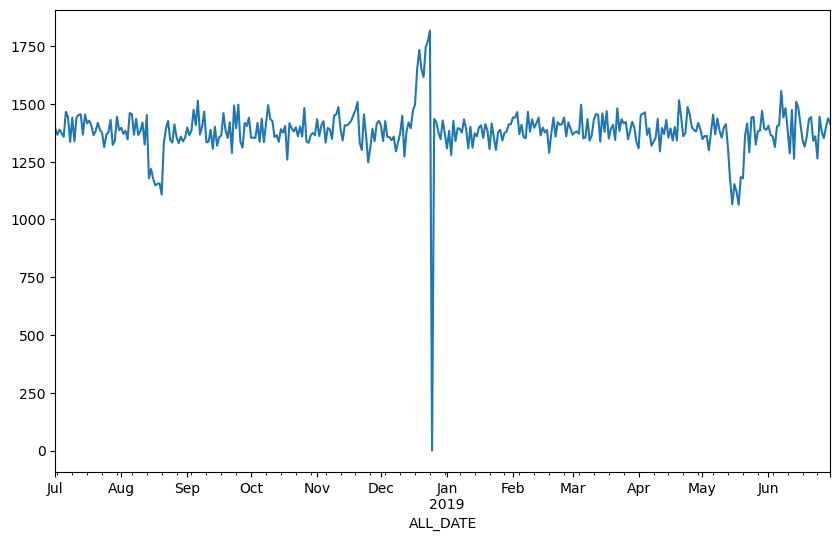

In [20]:
#plotting all dates

plt.figure(figsize=(10, 6))
merged_date.groupby('ALL_DATE')['PROD_QTY'].sum().plot()

We can see that there is an increase in purchases in December and a break in late December. Let's zoom in on this. 

In [21]:
#checking all transactions in the month december

december_transaction = merged_date[merged_date['ALL_DATE'].dt.month==12]
december_transaction

,DATE,PROD_QTY,ALL_DATE
153,2018-12-01,1406.0,2018-12-01
154,2018-12-02,1340.0,2018-12-02
155,2018-12-03,1426.0,2018-12-03
156,2018-12-04,1357.0,2018-12-04
157,2018-12-05,1357.0,2018-12-05
158,2018-12-06,1343.0,2018-12-06
159,2018-12-07,1359.0,2018-12-07
160,2018-12-08,1295.0,2018-12-08
161,2018-12-09,1334.0,2018-12-09
162,2018-12-10,1372.0,2018-12-10


<Axes: xlabel='ALL_DATE'>

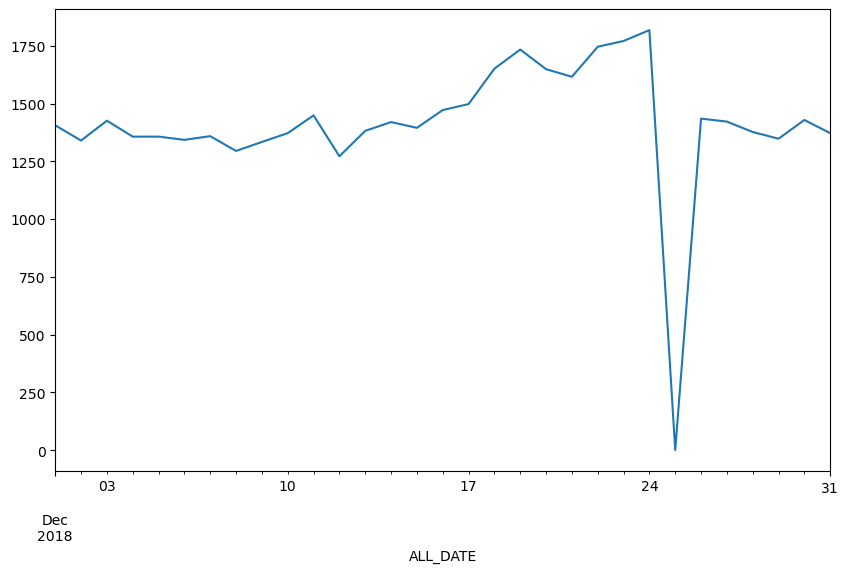

In [22]:
#plotting all transactions in december

plt.figure(figsize=(10, 6))
december_transaction.groupby('ALL_DATE')['PROD_QTY'].sum().plot()

In [23]:
#the missing date

merged_date.loc[merged_date.isna().any(axis=1)]

,DATE,PROD_QTY,ALL_DATE
364,NaT,NaN,2018-12-25


We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

Now that we are satisfied that the data no longer has outliers, we can move on to creating other features such as brand of chips or pack size from PROD_NAME.

In [24]:
#inspecting the product names
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [25]:
#some rows are salsa products not chips, so they will be removed

transaction_data[transaction_data['PROD_NAME'].str.contains('Salsa')]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [26]:
#removing all salsa products

salsa_products = transaction_data[transaction_data['PROD_NAME'].str.contains('Salsa')]

transaction_data.drop(salsa_products.index, inplace = True)

#confirming if they have been dropped
salsa_products

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
25,2019-05-15,39,39144,35506,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
32,2019-05-20,45,45127,41122,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4
44,2018-08-18,56,56013,50090,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
63,2019-05-15,82,82480,82047,101,Doritos Salsa Medium 300g,1,2.6
...,...,...,...,...,...,...,...,...
264675,2019-04-20,265,265103,263419,59,Old El Paso Salsa Dip Tomato Med 300g,1,5.1
264678,2019-03-30,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5
264719,2018-10-28,266,266278,264104,39,Smiths Crinkle Cut Tomato Salsa 150g,1,2.6
264734,2019-01-11,267,267324,264374,41,Doritos Salsa Mild 300g,1,2.6


In [27]:
#replacing all special character in product name

transaction_data['PROD_NAME'] = transaction_data['PROD_NAME'].str.replace(r'[^a-zA-Z0-9 ]+', '', regex=True).str.replace(r'\s+', ' ', regex=True).str.strip()

transaction_data['PROD_NAME']

0                 Natural Chip Compny SeaSalt175g
1                           CCs Nacho Cheese 175g
2           Smiths Crinkle Cut Chips Chicken 170g
3             Smiths Chip Thinly SCreamOnion 175g
4         Kettle Tortilla ChpsHnyJlpno Chili 150g
                           ...                   
264831    Kettle Sweet Chilli And Sour Cream 175g
264832               Tostitos Splash Of Lime 175g
264833                      Doritos Mexicana 170g
264834    Doritos Corn Chip Mexican Jalapeno 150g
264835               Tostitos Splash Of Lime 175g
Name: PROD_NAME, Length: 246739, dtype: object

In [28]:
# creating a new column for brand name
split_column = transaction_data['PROD_NAME'].str.split(" ", expand = True)

transaction_data['BRAND_NAME'] = split_column[0]

# displaying brand names
transaction_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

Some of the brand names looks similar. Let's inspect them

In [29]:
#investigating brand names that are not clear

transaction_data[transaction_data['BRAND_NAME']=='GrnWves']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME
56,2019-05-16,74,74336,73182,84,GrnWves Plus Btroot Chilli Jam 180g,5,15.5,GrnWves
298,2018-09-09,5,5026,4526,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
301,2018-07-09,5,5028,4534,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
387,2019-03-07,9,9140,8536,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
578,2018-11-11,24,24139,21077,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
...,...,...,...,...,...,...,...,...,...
263917,2018-10-24,233,233280,237047,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
264289,2018-11-12,248,248090,250299,84,GrnWves Plus Btroot Chilli Jam 180g,2,6.2,GrnWves
264479,2018-08-03,256,256237,255389,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,GrnWves
264639,2018-09-24,264,264300,263069,84,GrnWves Plus Btroot Chilli Jam 180g,1,3.1,GrnWves


In [30]:
transaction_data[transaction_data['BRAND_NAME']=='Infzns']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME
22,2018-08-16,36,36012,32077,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,Infzns
29,2019-05-20,43,43110,39342,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,Infzns
46,2019-05-16,59,59344,56007,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,Infzns
175,2018-08-16,237,237293,241451,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,Infzns
180,2019-05-15,246,246266,248373,31,Infzns Crn Crnchers Tangy Gcamole 110g,1,3.8,Infzns
...,...,...,...,...,...,...,...,...,...
264279,2019-05-23,248,248029,250225,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,Infzns
264327,2018-12-30,248,248355,250643,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,Infzns
264392,2018-11-23,251,251088,253111,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,Infzns
264582,2019-04-20,261,261229,260676,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,Infzns


In [31]:
transaction_data[transaction_data['BRAND_NAME']=='WW']

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME
13,2018-08-17,13,13213,12447,92,WW Crinkle Cut Chicken 175g,1,1.7,WW
94,2019-05-16,122,122185,125736,110,WW Original Corn Chips 200g,2,3.8,WW
99,2019-05-15,129,129134,133032,92,WW Crinkle Cut Chicken 175g,2,3.4,WW
111,2019-05-17,156,156236,158227,83,WW DStyle Chip Sea Salt 200g,1,1.9,WW
112,2019-05-18,156,156236,158228,110,WW Original Corn Chips 200g,2,3.8,WW
...,...,...,...,...,...,...,...,...,...
264772,2018-07-31,269,269204,266267,92,WW Crinkle Cut Chicken 175g,2,3.4,WW
264782,2019-04-07,269,269222,266384,72,WW Crinkle Cut Original 175g,2,3.4,WW
264803,2018-08-06,270,270110,267360,96,WW Original Stacked Chips 160g,2,3.8,WW
264804,2018-09-24,270,270110,267361,27,WW Supreme Cheese Corn Chips 200g,2,3.8,WW


After some research, I found out that:

- Infzns is Infuzions
- Dorito is Doritos
- Smith is Smiths
- RRD is Red
- Snbts is Sunbites
- GrnWves is Grain Waves
- NCC is Natural
- WW is Woolworths

We will replace them with the proper brand name

In [32]:
#replacing brand names

transaction_data = transaction_data.replace({'BRAND_NAME' : {'Infzns': 'Infuzions', 'Dorito': 'Doritos', 
                                                                     'Smith': 'Smiths', 'RRD': 'Red','Snbts': 'Sunbites',
                                                                     'GrnWves' : 'Grain', 'NCC': 'Natural', 'WW':'Woolworths'}})

In [33]:
#checking to confirm brand name adjustment

transaction_data['BRAND_NAME'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [34]:
#creating a new column for pack size

transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'([^a-zA-Z ]+)') + 'g'

transaction_data['PACK_SIZE'].unique()

array(['175g', '170g', '150g', '330g', '210g', '270g', '220g', '125g',
       '110g', '134g', '380g', '180g', '165g', '135g', '250g', '200g',
       '160g', '190g', '90g', '70g'], dtype=object)

In [35]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,Smiths,175g
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,Kettle,150g


In [36]:
#checking the numbers of unique customers after cleaning the data

transaction_data['LYLTY_CARD_NBR'].nunique()

71287

###  Examining the customer data

In [37]:
#checking the customer data

customer_data.head(10)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
5,1007,YOUNG SINGLES/COUPLES,Budget
6,1009,NEW FAMILIES,Premium
7,1010,YOUNG SINGLES/COUPLES,Mainstream
8,1011,OLDER SINGLES/COUPLES,Mainstream
9,1012,OLDER FAMILIES,Mainstream


In [38]:
#checking information about customers

customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [39]:
#checking for nulls

customer_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [40]:
#checking the lifestages of customer

customer_data['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [41]:
#checking the types of premier customers

customer_data['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [42]:
#checking for duplicates
duplicates = customer_data.duplicated(keep = False)
customer_data[duplicates]

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER


There seems to be no issues with the customer data, we can now go ahead and join the transaction and customer data sets together

In [43]:
#merging transactions and customer data

customer_transaction = transaction_data.merge(customer_data, how='left', on='LYLTY_CARD_NBR')
customer_transaction

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,Smiths,175g,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,Kettle,150g,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246734,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175g,YOUNG SINGLES/COUPLES,Premium
246735,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175g,YOUNG SINGLES/COUPLES,Premium
246736,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170g,YOUNG SINGLES/COUPLES,Premium
246737,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150g,YOUNG SINGLES/COUPLES,Premium


In [44]:
#checking for nulls

customer_transaction.isna().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
BRAND_NAME          0
PACK_SIZE           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [45]:
#checking for duplicates

duplicates = customer_transaction.duplicated(keep = False)
customer_transaction[duplicates]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER


In [46]:
#saving the customer transaction data as a csv file

customer_transaction.to_csv(r"C:\Users\DELL\Downloads\customer_transaction.csv")

### Data analysis on customer segments

Now that the data is ready for analysis, we can define some metrics of interest to the client:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is
- How many customers are in each segment
- How many chips are bought per customer by segment
- What's the average chip price by customer segment

In [47]:
#calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER

customer_transaction.pivot_table(values ='TOT_SALES', index = 'PREMIUM_CUSTOMER', columns = 'LIFESTAGE', aggfunc = np.sum)

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,33345.70,20607.45,156863.75,127833.60,105916.30,129717.95,57122.1
Mainstream,84734.25,15979.70,96413.55,124648.50,145168.95,86338.25,147582.2
Premium,54443.85,10760.80,75242.60,123531.55,91296.65,78571.70,39052.3


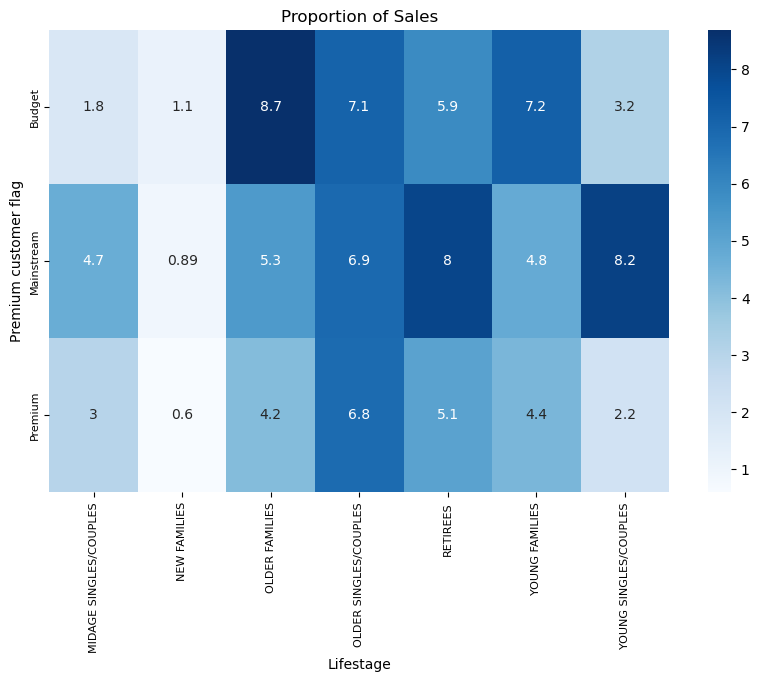

In [48]:
#calculating the proportion of sales by LIFESTAGE and PREMIUM_CUSTOMER

total_sales = customer_transaction['TOT_SALES'].sum()
pivoted = customer_transaction.pivot_table(values ='TOT_SALES', index = 'PREMIUM_CUSTOMER', columns = 'LIFESTAGE', aggfunc = np.sum)/total_sales*100 

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivoted, annot=True, cmap='Blues')

# Adding labels and title
plt.xlabel('Lifestage', fontsize=10)
plt.ylabel('Premium customer flag', fontsize=10)
plt.title('Proportion of Sales', fontsize=12) 

# Set the tick font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

Sales are coming mainly from **Budget - older families**, **Mainstream - young singles/couples**, and **Mainstream - retirees**. 

Let’s see if the higher sales are due to there being more customers who buy chips.

In [49]:
#calculating unique customers by LIFESTAGE and PREMIUM_CUSTOMER

customer_transaction.pivot_table(values ='LYLTY_CARD_NBR', index = 'PREMIUM_CUSTOMER', columns = 'LIFESTAGE', aggfunc = pd.Series.nunique)

LIFESTAGE,MIDAGE SINGLES/COUPLES,NEW FAMILIES,OLDER FAMILIES,OLDER SINGLES/COUPLES,RETIREES,YOUNG FAMILIES,YOUNG SINGLES/COUPLES
PREMIUM_CUSTOMER,,,,,,,
Budget,1474,1087,4611,4849,4385,3953,3647
Mainstream,3298,830,2788,4858,6358,2685,7917
Premium,2369,575,2231,4682,3812,2398,2480


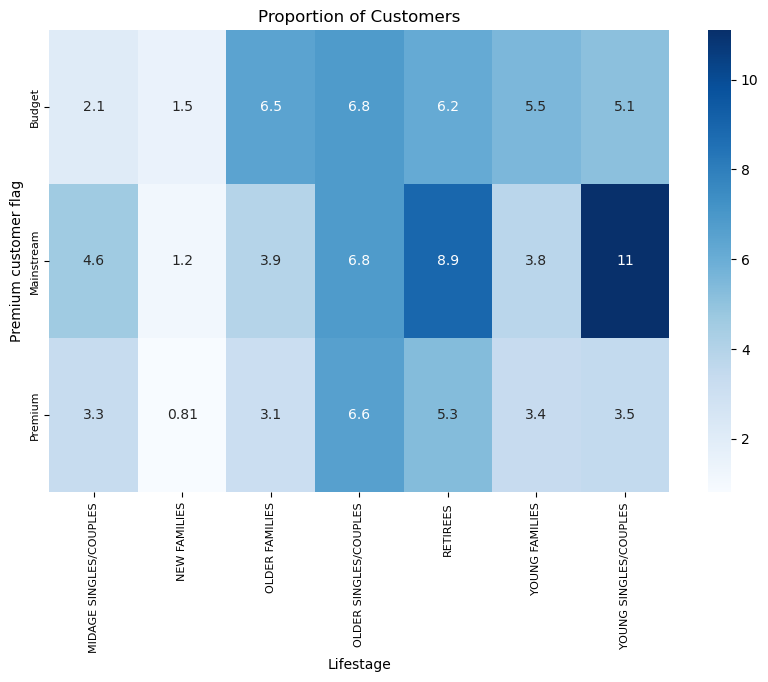

In [50]:
unique_count = customer_transaction['LYLTY_CARD_NBR'].nunique()
pivoted = customer_transaction.pivot_table(values ='LYLTY_CARD_NBR', index = 'PREMIUM_CUSTOMER', columns = 'LIFESTAGE', aggfunc = pd.Series.nunique)/unique_count*100 

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(pivoted, annot=True, cmap='Blues')

# Adding labels and title
plt.xlabel('Lifestage', fontsize=10)
plt.ylabel('Premium customer flag', fontsize=10)
plt.title('Proportion of Customers', fontsize=12) 

# Set the tick font size
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Show the plot
plt.show()

There are more **Mainstream - young singles/couples** and **Mainstream - retirees** who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer.
Let's have a look at this next.

In [51]:
#calculating units of chips brought per customer in each customer segment

customer_total_chips = customer_transaction.groupby(['LYLTY_CARD_NBR', 'PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].sum().reset_index()
avg_chips = customer_total_chips.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PROD_QTY'].mean().sort_values(ascending=False)
avg_chips.reset_index()

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY
0,Mainstream,OLDER FAMILIES,9.255380
1,Budget,OLDER FAMILIES,9.076773
2,Premium,OLDER FAMILIES,9.071717
3,Budget,YOUNG FAMILIES,8.722995
4,Premium,YOUNG FAMILIES,8.716013
5,Mainstream,YOUNG FAMILIES,8.638361
6,Budget,OLDER SINGLES/COUPLES,6.781398
7,Premium,OLDER SINGLES/COUPLES,6.769116
8,Mainstream,OLDER SINGLES/COUPLES,6.712021
9,Mainstream,MIDAGE SINGLES/COUPLES,6.432080


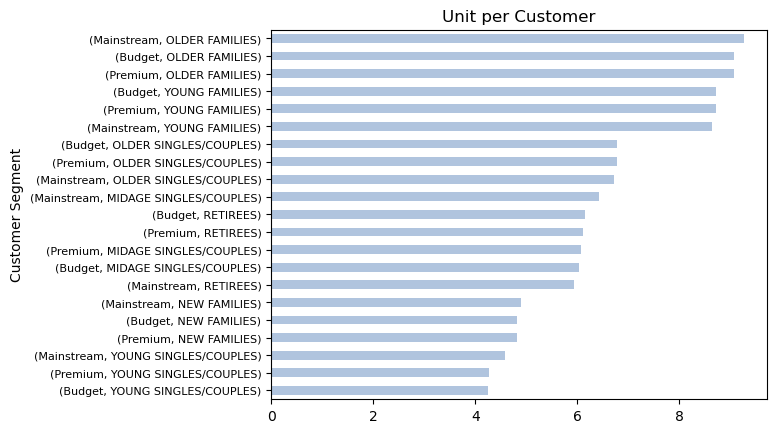

In [52]:
#plotting the units of chips brought per customer 

avg_chips.plot(kind='barh', color='lightsteelblue')
plt.gca().invert_yaxis()

# Adding labels and title
plt.ylabel('Customer Segment', fontsize=10)
plt.title('Unit per Customer', fontsize=12)
plt.yticks(fontsize=8)

# Show the chart
plt.show()

**Older families** and **young families** in general buy more chips per customer. 

Let's also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.

In [53]:
#creating a new column for price

customer_transaction['PRICE'] = customer_transaction['TOT_SALES']/customer_transaction['PROD_QTY']
customer_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,Smiths,175g,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,Kettle,150g,MIDAGE SINGLES/COUPLES,Budget,4.60


In [54]:
#calculating the average price per unit chips for each customer segment

chip_avg_price = customer_transaction.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE'])['PRICE'].mean().sort_values(ascending=False)
chip_avg_price.reset_index()

,PREMIUM_CUSTOMER,LIFESTAGE,PRICE
0,Mainstream,YOUNG SINGLES/COUPLES,4.065642
1,Mainstream,MIDAGE SINGLES/COUPLES,3.994241
2,Budget,RETIREES,3.924404
3,Premium,RETIREES,3.920942
4,Budget,NEW FAMILIES,3.917688
5,Mainstream,NEW FAMILIES,3.916133
6,Premium,OLDER SINGLES/COUPLES,3.893236
7,Budget,OLDER SINGLES/COUPLES,3.882096
8,Premium,NEW FAMILIES,3.872110
9,Mainstream,RETIREES,3.844294


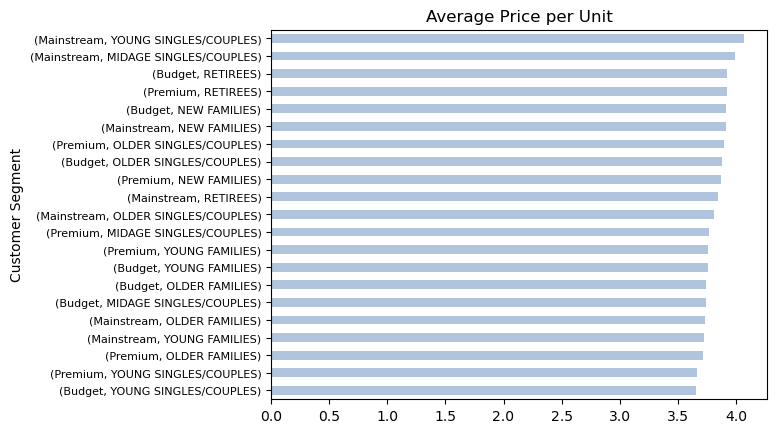

In [55]:
#plotting the average price per unit chips

chip_avg_price.plot(kind='barh', color='lightsteelblue')
plt.gca().invert_yaxis()

# Adding labels and title
plt.ylabel('Customer Segment', fontsize=10)
plt.title('Average Price per Unit', fontsize=12)
plt.yticks(fontsize=8)

# Show the chart
plt.show()

**Mainstream young singles couples** and **Mainstream midage** are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

As the difference in average price per unit isn't large, we can check if this difference is statistically different.

### T-test

Here, we would perform an independent t‐test between mainstream vs premium and budget - midage and young singles and couples

In [56]:
mainstream_midage_young = customer_transaction.query(' PREMIUM_CUSTOMER=="Mainstream" and (LIFESTAGE=="MIDAGE SINGLES/COUPLES" or LIFESTAGE=="YOUNG SINGLES/COUPLES")')
mainstream_midage_young

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
4692,2019-05-18,3,3159,1759,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,Doritos,170g,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4693,2019-05-16,3,3294,2370,51,Doritos Mexicana 170g,2,8.8,Doritos,170g,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4694,2018-08-18,4,4187,3492,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175g,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4695,2019-05-19,4,4264,3841,47,Doritos Corn Chips Original 170g,2,8.8,Doritos,170g,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4696,2018-08-19,7,7036,6447,114,Kettle Sensations Siracha Lime 150g,1,4.6,Kettle,150g,MIDAGE SINGLES/COUPLES,Mainstream,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240883,2018-12-01,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs,110g,YOUNG SINGLES/COUPLES,Mainstream,3.8
240884,2018-07-27,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,Kettle,150g,YOUNG SINGLES/COUPLES,Mainstream,4.6
240885,2018-11-10,272,272389,270201,26,Pringles SweetSpcy BBQ 134g,2,7.4,Pringles,134g,YOUNG SINGLES/COUPLES,Mainstream,3.7
240886,2019-04-01,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134g,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [57]:
other_midage_young = customer_transaction.query(' PREMIUM_CUSTOMER!="Mainstream" and (LIFESTAGE=="MIDAGE SINGLES/COUPLES" or LIFESTAGE=="YOUNG SINGLES/COUPLES")')
other_midage_young

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175g,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175g,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170g,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCreamOnion 175g,5,15.0,Smiths,175g,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHnyJlpno Chili 150g,3,13.8,Kettle,150g,MIDAGE SINGLES/COUPLES,Budget,4.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
246734,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,Kettle,175g,YOUNG SINGLES/COUPLES,Premium,5.40
246735,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,Tostitos,175g,YOUNG SINGLES/COUPLES,Premium,4.40
246736,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,Doritos,170g,YOUNG SINGLES/COUPLES,Premium,4.40
246737,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,Doritos,150g,YOUNG SINGLES/COUPLES,Premium,3.90


In [58]:
#performing a two Sample t‐test

mainstream = mainstream_midage_young['PRICE']
others = other_midage_young['PRICE']
t_stat, p_value = stats.ttest_ind(mainstream, others, equal_var=False)

In [59]:
# interpreting the results

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis; there is a significant difference between the average price per unit for mainstream (young and mid-age singles and couples) and that of budget or premium")
else:
    print("Fail to reject the null hypothesis; there is no significant difference between average price per unit for mainstream (young and mid-age singles and couples) and that of budget or premium")

Reject the null hypothesis; there is a significant difference between the average price per unit for mainstream (young and mid-age singles and couples) and that of budget or premium


We have found quite a few interesting insights that we can dive deeper into.

We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let’s look at Mainstream - young singles/couples and find out if they tend to buy a particular brand of chips and pack size.

In [60]:
#filtering out Mainstream - young singles/couples

mainstream_young = customer_transaction.query('PREMIUM_CUSTOMER=="Mainstream" and LIFESTAGE=="YOUNG SINGLES/COUPLES"')
mainstream_young

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND_NAME,PACK_SIZE,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
221344,2018-08-16,1,1020,26,19,Smiths Crinkle Cut SnagSauce 150g,1,2.6,Smiths,150g,YOUNG SINGLES/COUPLES,Mainstream,2.6
221345,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,Kettle,175g,YOUNG SINGLES/COUPLES,Mainstream,5.4
221346,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,Woolworths,200g,YOUNG SINGLES/COUPLES,Mainstream,1.9
221347,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,Smiths,380g,YOUNG SINGLES/COUPLES,Mainstream,5.9
221348,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,Pringles,134g,YOUNG SINGLES/COUPLES,Mainstream,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240883,2018-12-01,272,272377,270186,75,Cobs Popd Sea Salt Chips 110g,2,7.6,Cobs,110g,YOUNG SINGLES/COUPLES,Mainstream,3.8
240884,2018-07-27,272,272389,270200,114,Kettle Sensations Siracha Lime 150g,2,9.2,Kettle,150g,YOUNG SINGLES/COUPLES,Mainstream,4.6
240885,2018-11-10,272,272389,270201,26,Pringles SweetSpcy BBQ 134g,2,7.4,Pringles,134g,YOUNG SINGLES/COUPLES,Mainstream,3.7
240886,2019-04-01,272,272389,270202,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134g,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [61]:
#calculating the total quantity brought by Mainstream - young singles/couples
total_quantity = mainstream_young['PROD_QTY'].sum()

#calculating the percentage of quantity per brand
pivoted = mainstream_young.pivot_table(values ='PROD_QTY', index = 'BRAND_NAME', aggfunc = np.sum)/total_quantity*100
pivoted.sort_values(by = 'PROD_QTY', ascending=False)

,PROD_QTY
BRAND_NAME,
Kettle,19.798482
Doritos,12.276052
Pringles,11.942029
Smiths,9.636991
Infuzions,6.467909
Thins,6.037267
Twisties,4.618357
Tostitos,4.541063
Cobs,4.463768


 Mainstream - young singles/couples are buying more chips from **Kettle**, **Doritos** and **Pringles**

In [62]:
#calculating the number of pack sizes

mainstream_young['PACK_SIZE'].value_counts().reset_index()

,index,PACK_SIZE
0,175g,4997
1,150g,3080
2,134g,2315
3,110g,2051
4,170g,1575
5,330g,1195
6,165g,1102
7,380g,626
8,270g,620
9,210g,576


Mainstream - young singles/couples are more likely to buy **175g** and **150g** packs of chips

## Insights and Recommendation

- Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream retirees shoppers.
- We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. 
- Mainstream, midage and young singles and couples are also more likely to pay more per packet of chips. This may be indicative of impulse buying behaviour.
- We’ve also found that Mainstream young singles and couples are more likely to purchase Kettle chips compared to other brands. 

The Category Manager may want to increase the category’s performance by off-locating some Kettle and 175g packs of chips in discretionary space near segments where young singles and couples frequent to increase visibilty and impulse behaviour.
